In [3]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
import warnings
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [4]:
from american_option import *

In [5]:
base_df = pd.read_json('json/stacked_arima_base.json', orient='index')
arima_parameters = json.load(open('json/arima_band_parameters_stack_model.json', 'r'))
std_innovations = arima_parameters['std']
np.random.seed(0)

In [6]:
#Initialize option class
option = american_option(base_df, 24, 50000, std_innovations)

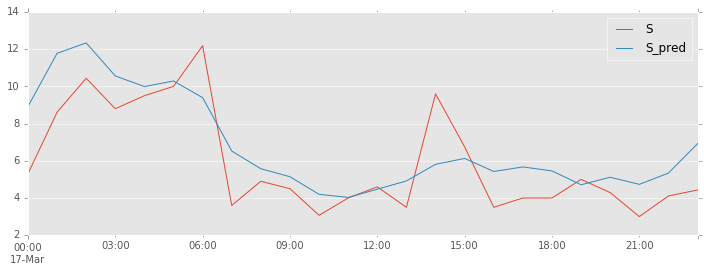

In [8]:
option.plot_real_predicted_values('2017-03-17 00:00:00')

In [9]:
df_mc = option.generate_random_paths('2017-03-17 00:00:00')

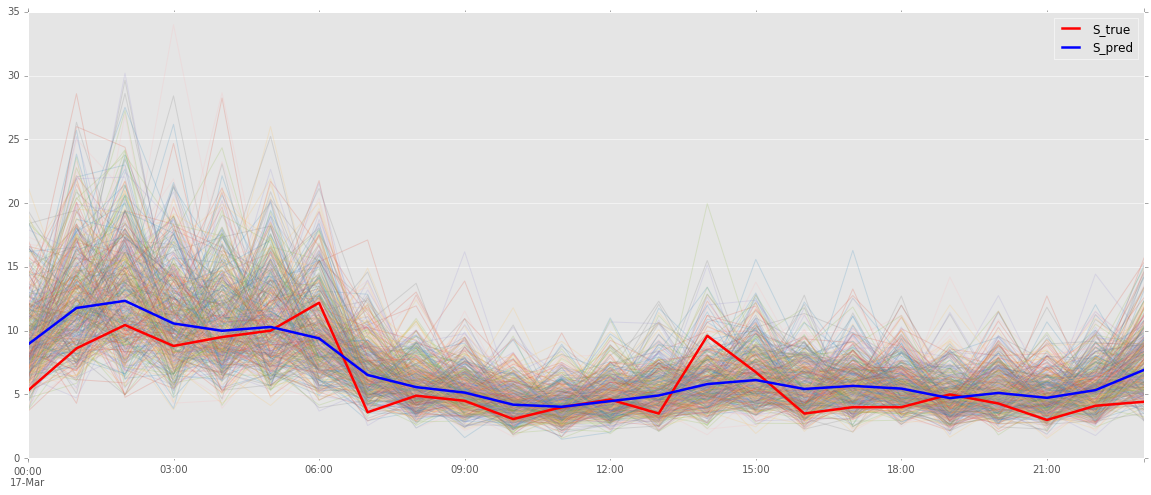

In [10]:
option.plot_montecarlo()

In [13]:
#Compute option value
option.compute_option_value(10, 3)

6.0740024382371107

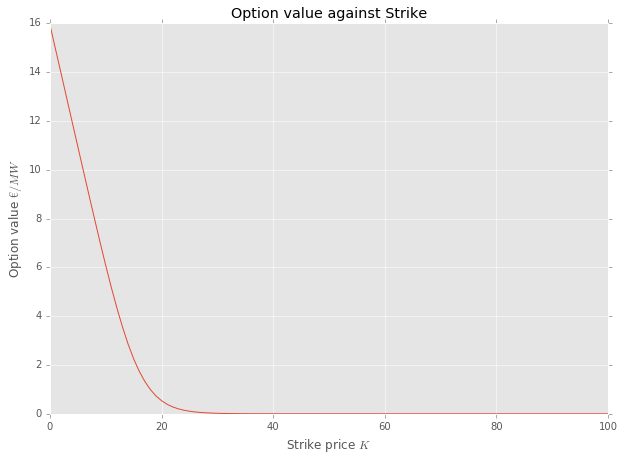

In [14]:
#Option value change against strike
K = np.linspace(0,100,101)
C_list = option.compute_option_value(K,3)
option.plot_option_value_vs_strike(K, C_list)